In [1]:
#%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qutip import *

In [3]:
from IPython.display import Image

In [4]:
%matplotlib inline

In [5]:
#qubit number

N=1

In [6]:
# Pauli operators (please do not care)

S=[]
for k in range(4): 
    
    S.append([])

S[0]=qeye(2)

S[1]=sigmax()

S[2]=sigmay()

S[3]=sigmaz()

In [7]:
# Xop(m) denotes X operator acting on the m th qubit

def Xop(m): 
    
    X=[]
    for n in range(N):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [8]:
# Yop(m) denotes Y operator acting on the m th qubit

def Yop(m): 
    
    X=[]
    for n in range(N):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [9]:
# Zop(m) denotes Z operator acting on the m th qubit

def Zop(m): 
    
    X=[]
    for n in range(N):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [10]:
# sigma minus operator for a qubit

minus=basis(2,0)*basis(2,1).dag()

In [11]:
# Minus(m) denotes sigma minus operator acting on the m th qubit (for T1 errors)

def Minus(m): 
    
    X=[]
    for n in range(N):
        
        if n==m:
            X.append(minus)
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [12]:
# initialisation to to |00...00>

def Initialstate(N): 
    
    X=[]
    for n in range(N):
        
        X.append(basis(2,0))
        
    X=tensor(X)
    
    return X

In [13]:
def Hadamard(m): 
    
    X=[]
    for n in range(N):
        
        if n==m:
            X.append(1.0/sqrt(2.0)*(sigmaz()+sigmax()))
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [14]:
init=Initialstate(N)

In [15]:
#settings of the system evolution
T=10

# number of steps
Stepnumber=1000
    

# Simulation time
tlist = np.linspace(0,T,int(Stepnumber))

# Simulation option
options=Odeoptions(nsteps=1000000, store_states=True)




In [16]:
# Initial state is set to a GHZ state


initialstate= Hadamard(0)*Initialstate(N)

In [17]:
initialstate

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [18]:
# Hamiltonian 

Hamil= Zop(0)

In [19]:
# Lindblad operators

# gamma is a dissipation rate
gamma=1

# The list c_ops contains Lindblad operators 
c_ops=[]
for n in range(N):
    c_ops.append(sqrt(gamma)*Minus(n))

In [20]:
#  Solving Lindblad master equation

output = mesolve(Hamil, initialstate, tlist, c_ops, [], options=options)




In [21]:
# Final state

output.states[Stepnumber-1]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[9.99977300e-01+0.j         1.37488248e-03-0.00307557j]
 [1.37488248e-03+0.00307557j 2.26999821e-05+0.j        ]]

In [26]:
tlist

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

In [22]:
# Evolution of Pauli operators

sigmaX =  [(rho*Xop(0)).tr() for rho in output.states]

sigmaY =  [(rho*Yop(0)).tr() for rho in output.states]

sigmaZ =  [(rho*Zop(0)).tr() for rho in output.states]

Text(0.5, 1.0, 'Dissipation')

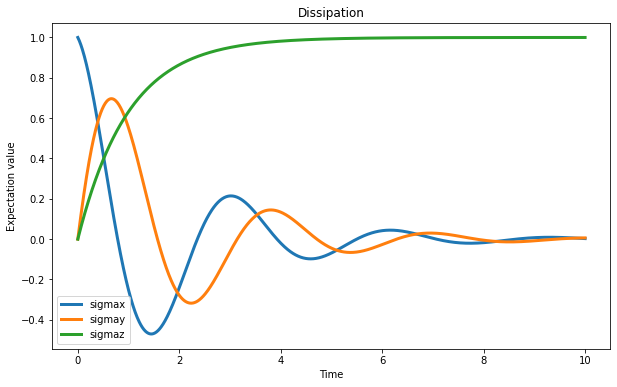

In [23]:
# Plot results

fig, axes = plt.subplots(1, 1, figsize=(10,6))



axes.plot(tlist, sigmaX, label="sigmax",linewidth=3.0)

axes.plot(tlist, sigmaY, label="sigmay",linewidth=3.0)

axes.plot(tlist, sigmaZ, label="sigmaz",linewidth=3.0)






axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Expectation value')
axes.set_title('Dissipation')